### Loading data
- the train set is 4.7G.If loading it one time, it will lead to memory overflow.
- loading stores, items, oil, transaction and holiday_event information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = r"F:\Diverse\statistics\Python_data_analysis\Kaggle项目\20171024-Grocery_sale"
os.chdir(path)

%matplotlib inline

In [2]:
dtypes = {"store_nbr": "int64",
         "item_nbr": "int64",
         "unit_sales": "float64",
         "onpromotion": bool}
reader = pd.read_csv(r"dataset/train.csv", index_col="id", parse_dates=["date"],
                     dtype=dtypes, skiprows=range(1, 88042204))

D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
reader.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
86999999,2016-08-04,14,1464238,16.0,False
87000000,2016-08-04,14,1464239,4.0,False
87000001,2016-08-04,14,1464241,22.0,False
87000002,2016-08-04,14,1464312,20.0,False
87000003,2016-08-04,14,1466047,2.0,False


In [4]:
reader.loc[reader.date=="2016-08-15"]

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
88042205,2016-08-15,1,103665,1.0,False
88042206,2016-08-15,1,105574,1.0,False
88042207,2016-08-15,1,105575,19.0,False
88042208,2016-08-15,1,105577,1.0,False
88042209,2016-08-15,1,105693,1.0,False
88042210,2016-08-15,1,105737,12.0,False
88042211,2016-08-15,1,105857,6.0,False
88042212,2016-08-15,1,106716,1.0,False
88042213,2016-08-15,1,108696,1.0,True


In [2]:
#load stores info
dtypes = {"store_nbr": "int8", "cluster": "int32"}
stores = pd.read_csv(r"dataset/stores.csv",dtype=dtypes)

#load items info
dtypes = {"item_nbr": "int32", "class": "int16", "perishable": "int8"}
items = pd.read_csv(r"dataset/items.csv", dtype=dtypes)

#load transactions info
dtypes = {"transactions": "int16", "store_nbr": "int8"}
transactions = pd.read_csv(r"dataset/transactions.csv", parse_dates=["date"], dtype=dtypes)

#load oil info
dtypes = {"dcoilwtico": "float32"}
oil = pd.read_csv(r"dataset/oil.csv",index_col="date", parse_dates=["date"], dtype=dtypes)

#load holiday events info
holiday = pd.read_csv(r"dataset/holidays_events.csv", parse_dates=["date"])

#load train_sample info
dtypes = {"store_nbr": "int64",
         "item_nbr": "int64",
         "unit_sales": "float64",
         "onpromotion": bool}
train_sample = pd.read_csv(r"dataset/train_sample.csv", index_col="id", parse_dates=["date"], dtype=dtypes)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### visualize dataset

#### visualize train_sample

In [3]:
train_sample.columns

Index(['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

In [4]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254970 entries, 276826 to 125471812
Data columns (total 5 columns):
date           1254970 non-null datetime64[ns]
store_nbr      1254970 non-null int64
item_nbr       1254970 non-null int64
unit_sales     1254970 non-null float64
onpromotion    1038363 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 57.4+ MB


In [5]:
train_sample.describe()

,store_nbr,item_nbr,unit_sales
count,1.254970e+06,1.254970e+06,1.254970e+06
mean,2.747032e+01,9.734516e+05,8.547935e+00
std,1.632863e+01,5.208130e+05,2.058838e+01
min,1.000000e+00,9.699500e+04,-1.660000e+02
25%,1.200000e+01,5.227210e+05,2.000000e+00
50%,2.800000e+01,9.595020e+05,4.000000e+00
75%,4.300000e+01,1.354381e+06,9.000000e+00
max,5.400000e+01,2.127114e+06,6.062000e+03


In [6]:
train = train_sample.sort_values(by=["date"]).copy()

##### the unit_sales of date

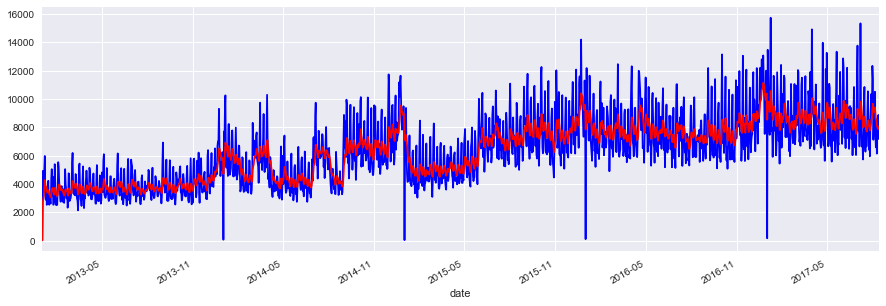

In [7]:
train_groupby_date = train.groupby(["date"])["unit_sales"].sum()
train_groupby_date_ewma = pd.Series.ewm(train_groupby_date, span=10).mean()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
train_groupby_date.plot(kind="line", style="b",ax=ax)
train_groupby_date_ewma.plot(kind="line", style="r-" , ax=ax)

##### the unit_sales of store

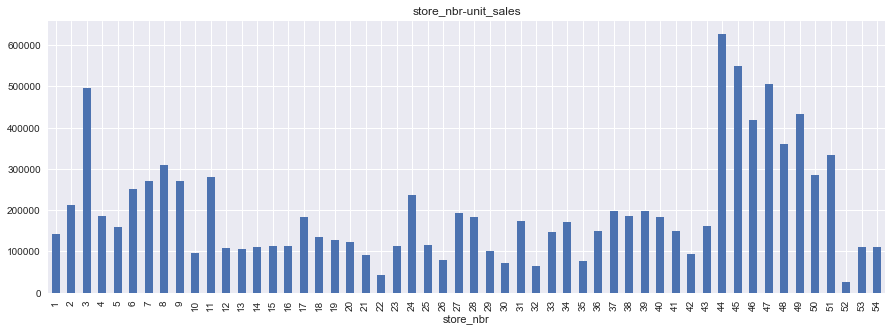

In [8]:
train_groupby_store = train.groupby(["store_nbr"])["unit_sales"].sum()

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,5)
train_groupby_store.plot(kind="bar", style="b",ax=ax)
ax.set_title("store_nbr-unit_sales")

##### the onpromotion of date

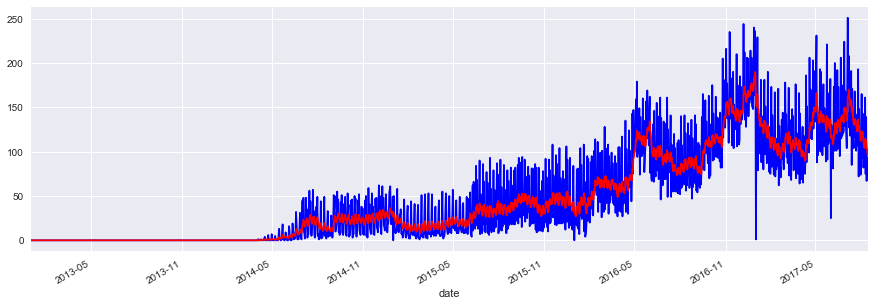

In [9]:
train_groupby_onpromotion = train.groupby(["date"])["onpromotion"].sum().fillna(0)
train_groupby_onpromotion_ewma = pd.Series.ewm(train_groupby_onpromotion, span=10).mean()

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,5)
train_groupby_onpromotion.plot(kind="line", style="b", ax=ax)
train_groupby_onpromotion_ewma.plot(kind="line", style="r-", ax=ax)

##### the onpromotion of store

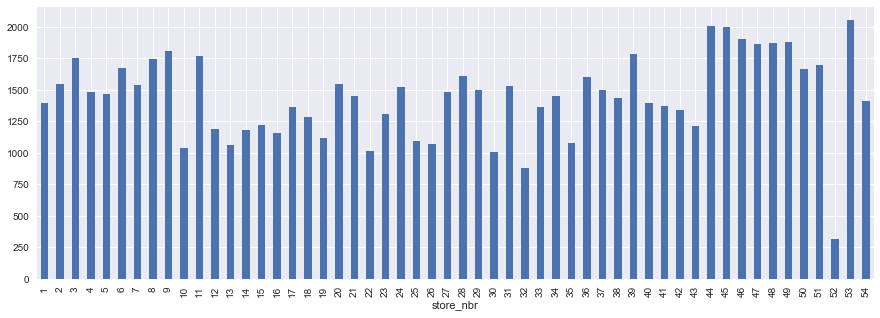

In [10]:
train_groupby_store_onpromotion = train.groupby(["store_nbr"])["onpromotion"].sum()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
train_groupby_store_onpromotion.plot(kind="bar", ax=ax)

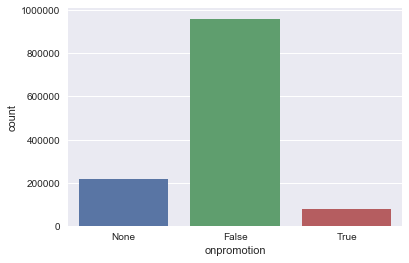

In [11]:
sns.countplot(x="onpromotion",data=train.fillna("None"))

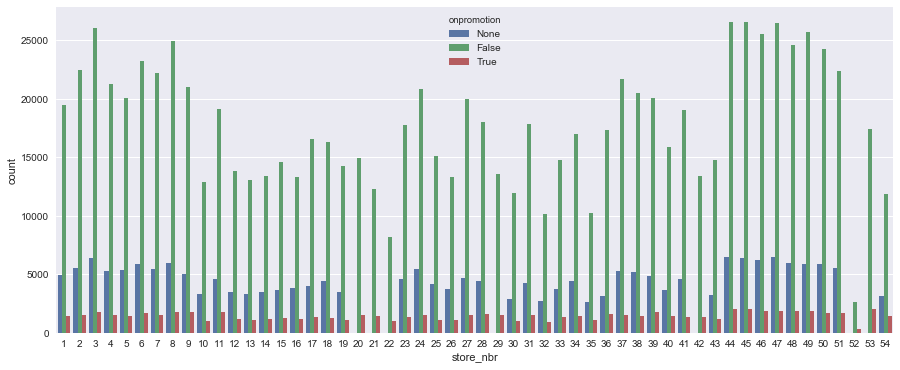

In [12]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
sns.countplot(x="store_nbr", hue="onpromotion", data=train.fillna("None"), ax=ax)

##### distribution of items_nbr and unit_sales

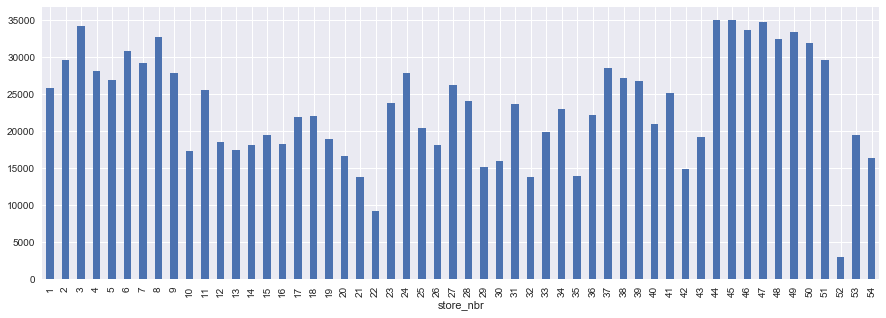

In [13]:
data=train_sample.groupby("store_nbr")["item_nbr"].count()
data.plot(kind="bar", figsize=(15,5))

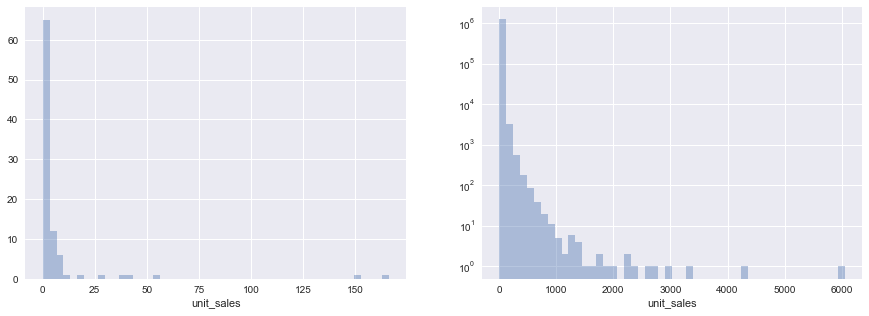

In [14]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.distplot(-train_sample[train_sample.unit_sales<0].unit_sales, kde=False, ax=ax[0])
sns.distplot(train_sample[train_sample.unit_sales>0].unit_sales, kde=False, ax=ax[1], hist_kws={"log":True})

##### conclusion

- the unit_sales of date show an periodly increasing trend over time
- the unit_sales of store show a strong variation sales for different store number
- the onpromotion of date show an increasing trend over time especially at 2014-05
- the onpromotion of store show that whether to onpromotion have a similiar strong variation for different store number
- **the stores of higher sales sells more items and more onpromotion**

#### visualize transaction

In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
date            83488 non-null datetime64[ns]
store_nbr       83488 non-null int8
transactions    83488 non-null int16
dtypes: datetime64[ns](1), int16(1), int8(1)
memory usage: 896.9 KB


In [16]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


##### the transactions of date

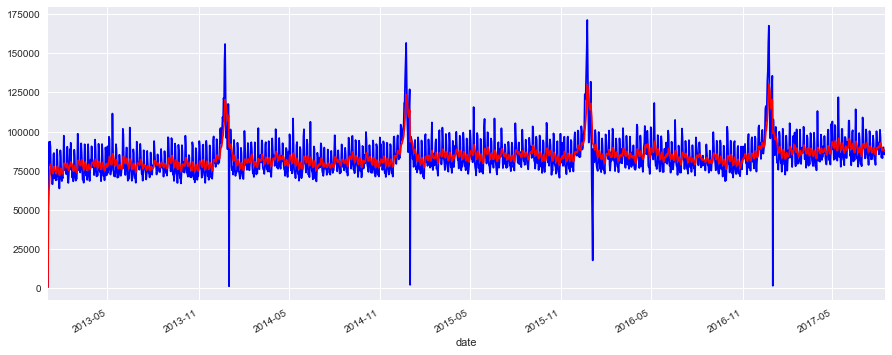

In [17]:
transaction_groupby_date = transactions.groupby("date")["transactions"].sum()
transaction_groupby_date_ewm = pd.Series.ewm(transaction_groupby_date, span=10).mean()

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
transaction_groupby_date.plot(kind="line",style="b",ax=ax)
transaction_groupby_date_ewm.plot(kind="line", style="r-", ax=ax)

In [18]:
transactions.nlargest(10, columns=["transactions"])

,date,store_nbr,transactions
52011,2015-12-23,44,8359
71010,2016-12-23,44,8307
16570,2013-12-23,44,8256
33700,2014-12-23,44,8120
16572,2013-12-23,46,8001
16619,2013-12-24,46,7840
16573,2013-12-23,47,7727
52064,2015-12-24,44,7700
33748,2014-12-24,44,7689
70904,2016-12-21,44,7597


#####  the transactions of store

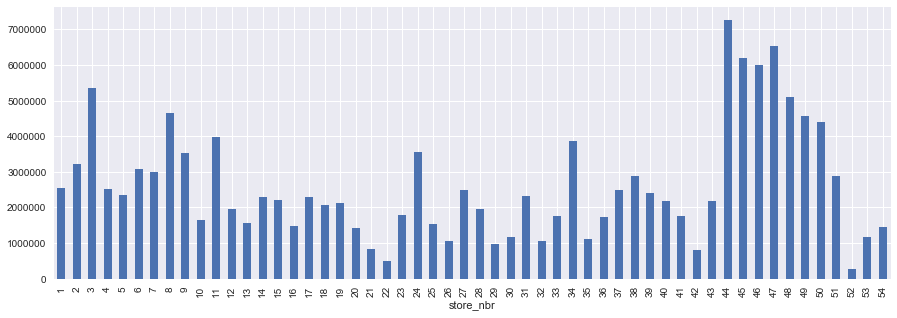

In [19]:
transactions_groupby_store = transactions.groupby("store_nbr")["transactions"].sum()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
transactions_groupby_store.plot(kind="bar",ax=ax)

##### conclusion

- show a period rule, about 1 year
- growth trend 
- **maybe we should take a look about holiday events**
- the store number of 44~51 get a higher transactions
- few store number ,such as 21,42,52, get a lower transactions
- **we maybe find out something useful from stores**

#### visualize store

In [20]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
store_nbr    54 non-null int8
city         54 non-null object
state        54 non-null object
type         54 non-null object
cluster      54 non-null int32
dtypes: int32(1), int8(1), object(3)
memory usage: 1.6+ KB


In [21]:
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [22]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [23]:
stores.describe(include=[np.object])

,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


In [24]:
stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'], dtype=object)

cayambe salinas daule quevedo playas libertad manta el-carmen

##### city / state and store

In [25]:
state_group = stores.groupby("state")
state_group["city"].unique()

state
Azuay                                                         [Cuenca]
Bolivar                                                     [Guaranda]
Chimborazo                                                  [Riobamba]
Cotopaxi                                                   [Latacunga]
El Oro                                                       [Machala]
Esmeraldas                                                [Esmeraldas]
Guayas                            [Guayaquil, Daule, Playas, Libertad]
Imbabura                                                      [Ibarra]
Loja                                                            [Loja]
Los Rios                                           [Babahoyo, Quevedo]
Manabi                                              [Manta, El Carmen]
Pastaza                                                         [Puyo]
Pichincha                                             [Quito, Cayambe]
Santa Elena                                                  [Salinas]


In [26]:
state_group["store_nbr"].unique()

state
Azuay                                                                  [37, 39, 42]
Bolivar                                                                        [19]
Chimborazo                                                                     [14]
Cotopaxi                                                                   [12, 13]
El Oro                                                                     [40, 41]
Esmeraldas                                                                     [43]
Guayas                                 [24, 26, 27, 28, 29, 30, 32, 34, 35, 36, 51]
Imbabura                                                                       [15]
Loja                                                                           [38]
Los Rios                                                                   [31, 33]
Manabi                                                                 [52, 53, 54]
Pastaza                                                               

In [27]:
stores.groupby("city")["store_nbr"].unique()

city
Ambato                                                    [23, 50]
Babahoyo                                                      [31]
Cayambe                                                       [11]
Cuenca                                                [37, 39, 42]
Daule                                                         [27]
El Carmen                                                     [54]
Esmeraldas                                                    [43]
Guaranda                                                      [19]
Guayaquil                         [24, 26, 28, 29, 30, 32, 34, 51]
Ibarra                                                        [15]
Latacunga                                                 [12, 13]
Libertad                                                      [36]
Loja                                                          [38]
Machala                                                   [40, 41]
Manta                                                    

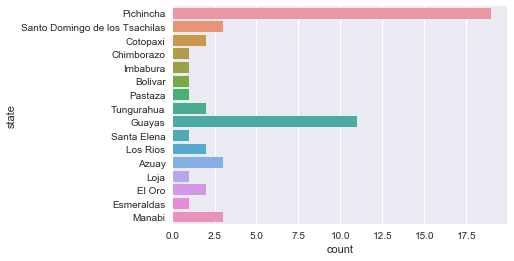

In [28]:
sns.countplot(y="state", data=stores)

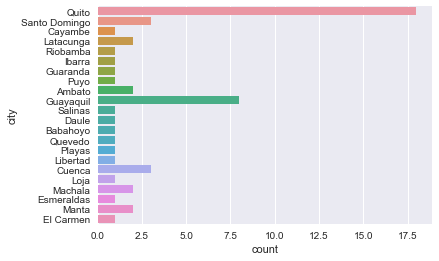

In [29]:
sns.countplot(y="city", data=stores)

##### cluster/type and store

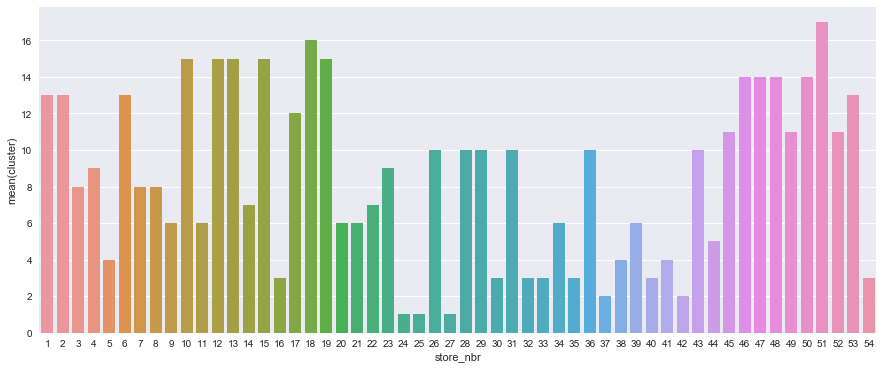

In [30]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
sns.barplot(x="store_nbr", y="cluster", data=stores, ax=ax)

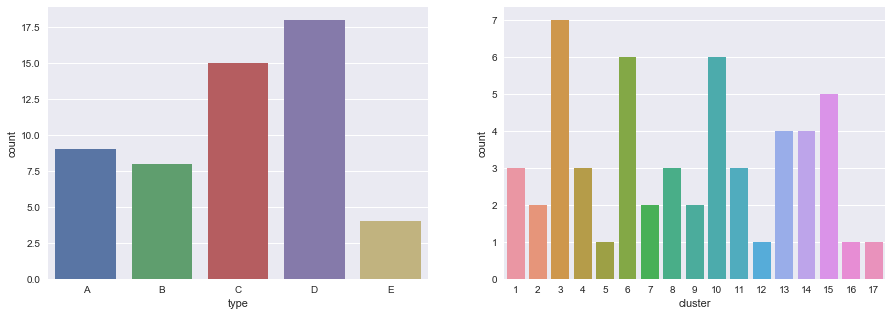

In [31]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="type",data=stores,ax=ax[0], order="ABCDE")
sns.countplot(x="cluster",data=stores,ax=ax[1])

In [32]:
stores.groupby("type")["cluster"].unique()

type
A            [5, 11, 14, 17]
B                [6, 16, 10]
C             [15, 7, 3, 12]
D    [13, 8, 9, 4, 1, 10, 2]
E                       [10]
Name: cluster, dtype: object

##### conclusion

- Guayas have 4 city&11 stores, Pichicha have 2 city&18 stores, most cities only have one store&2-3 cities/1 city 
- type D and C have most frequent
- **According to state/city information, we can discrete the state into some intervel**

#### visualize items

In [33]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [34]:
items.describe(include=[np.object])

,family
count,4100
unique,33
top,GROCERY I
freq,1334


In [35]:
items.describe()

,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


In [36]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
item_nbr      4100 non-null int32
family        4100 non-null object
class         4100 non-null int16
perishable    4100 non-null int8
dtypes: int16(1), int32(1), int8(1), object(1)
memory usage: 60.1+ KB


##### family and perishable

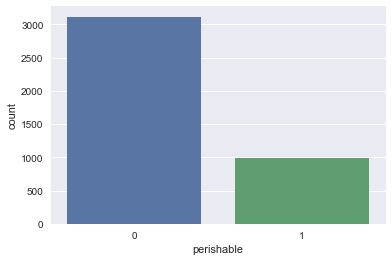

In [37]:
sns.countplot(x="perishable", data=items)

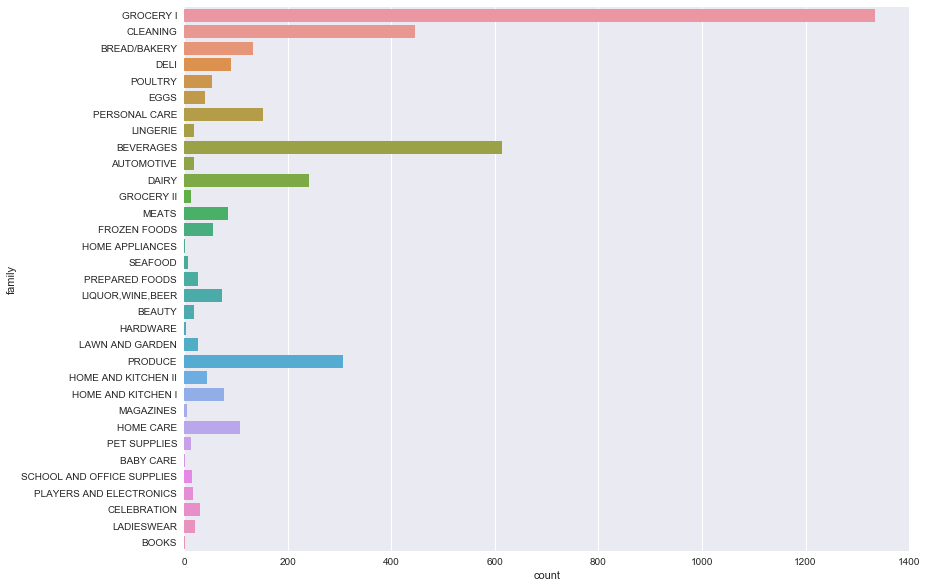

In [38]:
ax = sns.countplot(y="family",data=items)
ax.get_figure().set_size_inches(13,10)

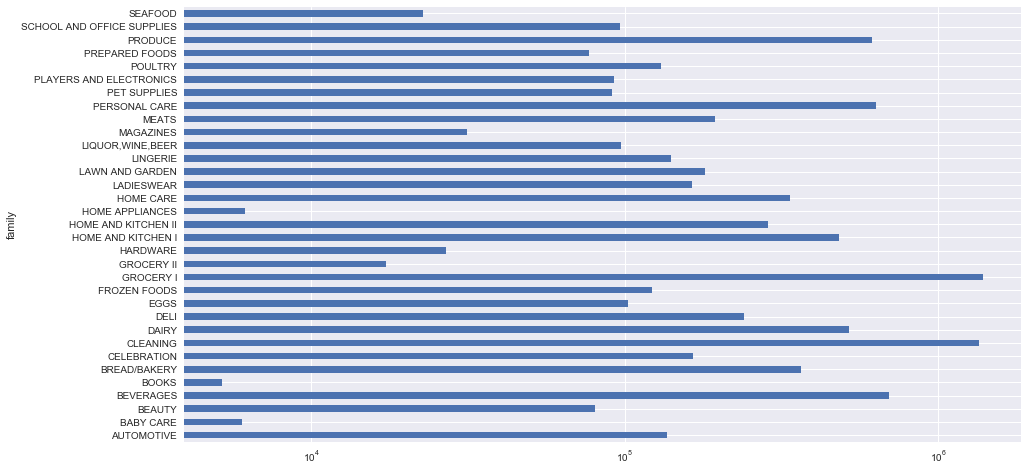

In [39]:
class_nbr = items.groupby("family")["class"].sum()
class_nbr.plot(kind="barh",figsize=(15,8), logx=True, sort_columns=True )

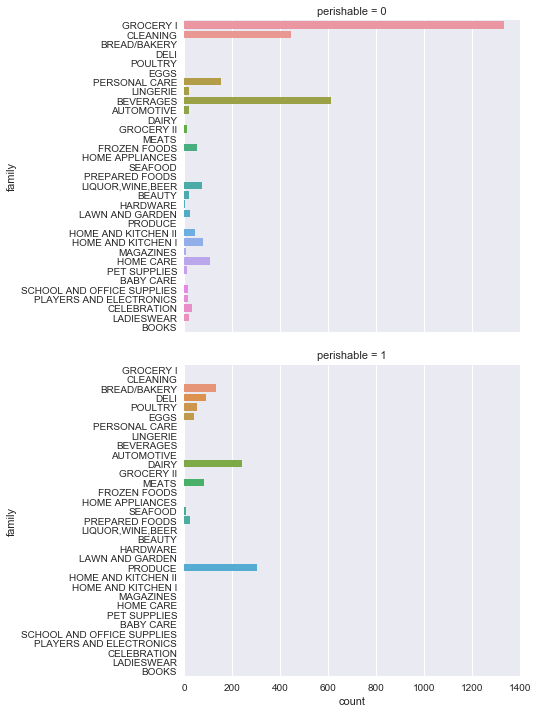

In [40]:
ax = sns.factorplot( y="family", row="perishable", kind="count", data=items)
ax.fig.set_size_inches(15,10)

##### class bar

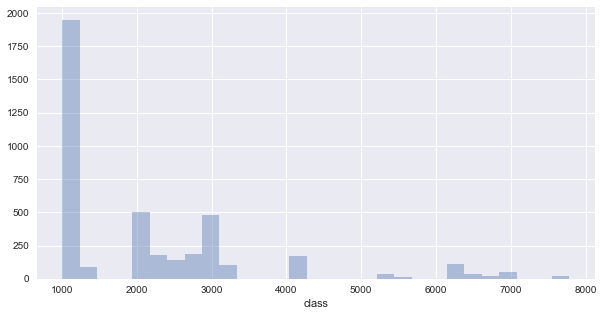

In [41]:
ax=sns.distplot(items["class"], kde=False)
ax.get_figure().set_size_inches(10,5)

##### conclusion

- about 1/4 items are perishable, perishable items contain 9 kinds of family.
- there are 337 unique class value and 33 unique family value
- lots of family have 1000+ class, few have 4000+ class
- we can **convert the item numbers to family and class**
- we can **discrete the class range into some sub-division interval**, such as _7 subinterval_

#### visualize oil

In [42]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.139999
2013-01-03,92.970001
2013-01-04,93.120003
2013-01-07,93.199997


In [43]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714317
std,25.630465
min,26.190001
25%,46.405001
50%,53.189999
75%,95.660000
max,110.620003


In [44]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
dcoilwtico    1175 non-null float32
dtypes: float32(1)
memory usage: 14.3 KB


##### oil price

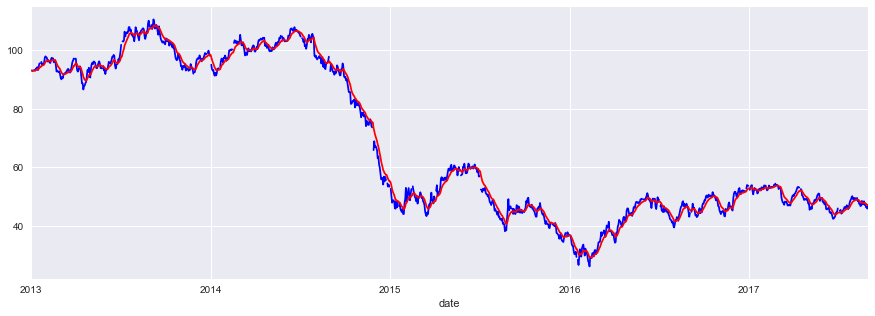

In [45]:
price_ewm = pd.Series.ewm(oil, span=10).mean()

fig, ax = plt.subplots(figsize=(15,5))
oil.plot(kind="line", style="b", ax=ax, legend=False)
price_ewm.plot(kind="line", style="r-", ax=ax, legend=False)

##### week & month price

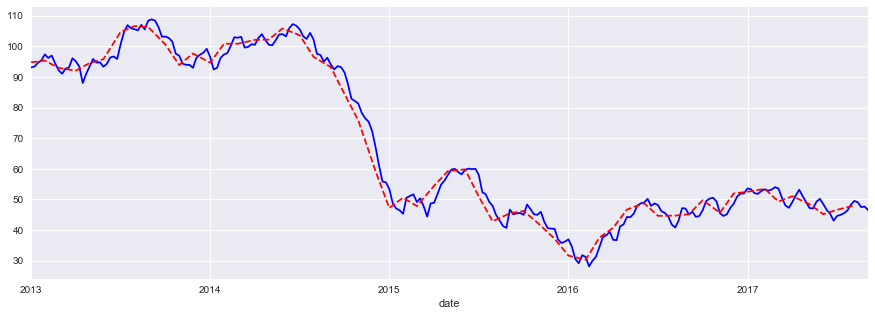

In [46]:
price_week = oil.resample("W").mean()
price_month = oil.resample("M").mean()

fig, ax = plt.subplots(figsize=(15,5))
price_week.plot(kind="line", style="b", legend=False, ax=ax)
price_month.plot(kind="line", style="r--", legend=False, ax=ax)

##### conclusion

- There are strong, long-term changes in oil price. In 2014.7 , the price of oil show a obvious drop.
- we maybe consider **the oil price as a feature**.
- becasuse of the infomation of oil file **ranging from 2013-1-1 to 2017-8-31**,we needn't to predict oil price.

#### visualize holiday events

In [47]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [48]:
holiday.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25 00:00:00,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338
first,2012-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2017-12-26 00:00:00,NaN,NaN,NaN,NaN,NaN


In [49]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
date           350 non-null datetime64[ns]
type           350 non-null object
locale         350 non-null object
locale_name    350 non-null object
description    350 non-null object
transferred    350 non-null bool
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


##### the countplot of transferred/type/locale 

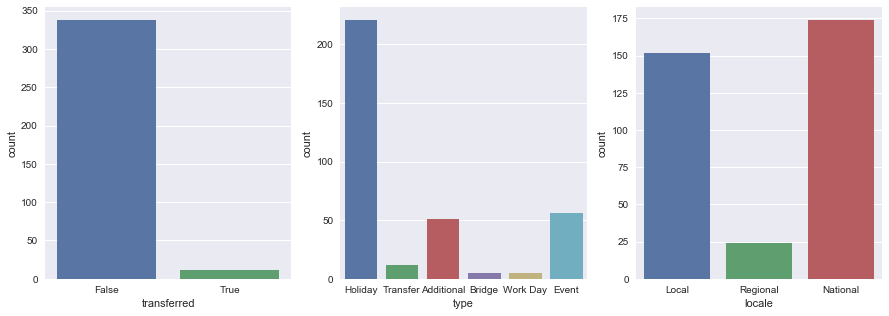

In [50]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x="transferred", data=holiday, ax=ax[0])
sns.countplot(x="type", data=holiday, ax=ax[1])
sns.countplot(x="locale", data=holiday, ax=ax[2])

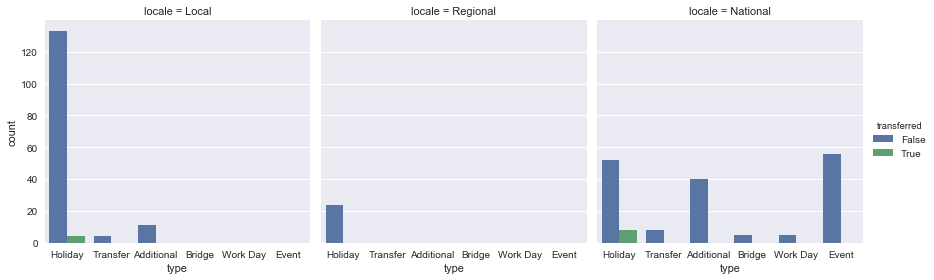

In [51]:
sns.factorplot(x="type",hue="transferred",col="locale", data=holiday, kind="count")

##### the countplot of locale_name/description

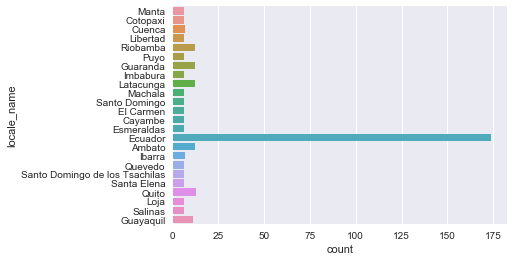

In [52]:
sns.countplot(y="locale_name", data=holiday)

In [53]:
holiday.groupby("description").size().sort_values(ascending=False).head()

description
Carnaval                      10
Fundacion de Ibarra            7
Fundacion de Cuenca            7
Independencia de Latacunga     6
Fundacion de Quito-1           6
dtype: int64

##### conclusion

- there are few transferred holiday and few regional holiday
- regional event only have holiday type
- most holiday events belong to Ecudaor

### explorate the negative unit_sales

In [54]:
neg_train = train[train.unit_sales<0]

In [55]:
neg_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1482519 to 122361549
Data columns (total 5 columns):
date           91 non-null datetime64[ns]
store_nbr      91 non-null int64
item_nbr       91 non-null int64
unit_sales     91 non-null float64
onpromotion    73 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.3+ KB


In [56]:
neg_stores = pd.merge(neg_train, stores, left_on="store_nbr", right_on="store_nbr")
neg_all = pd.merge(neg_stores, items, left_on="item_nbr", right_on="item_nbr")

In [57]:
neg_all.describe()

,store_nbr,item_nbr,unit_sales,cluster,class,perishable
count,91.000000,9.100000e+01,91.000000,91.000000,91.000000,91.000000
mean,26.043956,1.005050e+06,-7.791033,9.736264,2112.769231,0.208791
std,17.343530,5.572505e+05,24.267575,4.642402,1545.213628,0.408697
min,1.000000,9.919700e+04,-166.000000,1.000000,1004.000000,0.000000
25%,8.000000,4.590935e+05,-4.000000,6.000000,1073.000000,0.000000
50%,26.000000,1.062926e+06,-1.000000,10.000000,1148.000000,0.000000
75%,43.500000,1.463874e+06,-1.000000,14.000000,2678.000000,0.000000
max,54.000000,2.010786e+06,-0.072000,17.000000,7034.000000,1.000000


In [58]:
neg_all.describe(include=[np.object])

,onpromotion,city,state,type,family
count,73,91,91,91,91
unique,1,18,15,5,19
top,False,Quito,Pichincha,D,GROCERY I
freq,73,53,53,38,24


In [59]:
neg_all.nsmallest(10,"unit_sales")

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster,family,class,perishable
85,2017-06-29,27,418235,-166.0,False,Daule,Guayas,D,1,BEVERAGES,1122,0
6,2015-12-11,18,557241,-150.0,False,Quito,Pichincha,B,16,FROZEN FOODS,2226,0
26,2013-04-13,39,469643,-56.0,NaN,Cuenca,Azuay,B,6,GROCERY I,1030,0
87,2017-01-14,19,1047707,-42.0,False,Guaranda,Bolivar,C,15,BEVERAGES,1122,0
86,2016-12-23,32,1464093,-37.0,False,Guayaquil,Guayas,C,3,BEVERAGES,1148,0
24,2016-12-14,50,1047695,-29.0,False,Ambato,Tungurahua,A,14,BEVERAGES,1122,0
13,2016-10-17,4,1309246,-17.0,False,Quito,Pichincha,D,9,BREAD/BAKERY,2786,1
32,2013-05-30,34,679603,-13.0,NaN,Guayaquil,Guayas,B,6,BREAD/BAKERY,2712,1
50,2015-10-31,2,1463887,-10.0,False,Quito,Pichincha,D,13,BEVERAGES,1144,0
77,2016-08-09,41,1047674,-10.0,False,Machala,El Oro,D,4,BEVERAGES,1120,0


In [60]:
neg_all.groupby("perishable").size()

perishable
0    72
1    19
dtype: int64